{'Fp1': 8.228683, 'Fp2': 7.822179, 'F3': 6.303446, 'F4': 6.814386, 'C3': 6.516836, 'C4': 6.192795, 'P3': 7.505881, 'P4': 6.974121, 'O1': 8.297202, 'O2': 7.733954, 'F7': 7.950995, 'F8': 7.002463, 'T3': 5.532659, 'T4': 4.936278, 'T5': 7.032955, 'T6': 8.49266, 'Fz': 6.304727, 'Cz': 6.947293, 'Pz': 7.145392}


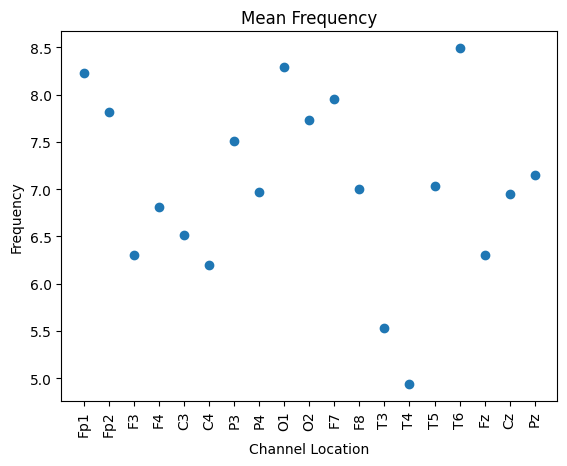

{('Fz', 'F3'): 0.072916, ('Fz', 'F4'): 0.088293, ('F8', 'F7'): 0.102904}
{('F3', 'Fz'): 0.910679, ('F4', 'Fz'): 0.880618, ('O1', 'O2'): 0.855268}


/var/folders/wn/m276s3t925l42mst_lbrlw9h0000gn/T/ipykernel_818/2402617759.py:98: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value in min_values.iteritems():
/var/folders/wn/m276s3t925l42mst_lbrlw9h0000gn/T/ipykernel_818/2402617759.py:104: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value in max_values.iteritems():


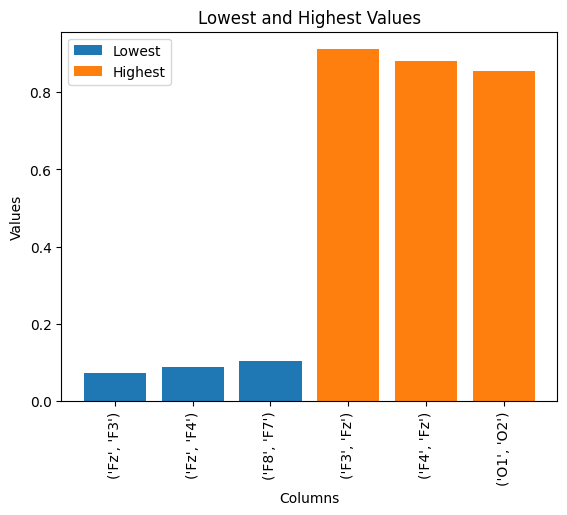

In [66]:
#!pip3 install pandas
#import pandas as pd

#!pip3 install numpy
#import numpy as np

#import matplotlib as m

#!pip3 install xlrd
#!pip3 install openpyxl

import pandas as pd
import matplotlib.pyplot as plt

#get file name/locaiton
#file_name = input("Input the file name")
#print(file_name)

# determine if the file is a match
'''
match = False

#TO DO: ensure that the file inputted matches necessary format -- could also put this in the class
def file_match():
    while match == False:
        # determine what makes a "match":
        1) Is an excel spreadsheet
        2) Contains the necessary pages - "Scalars", "coherence", etc.
        --> could use file_name.info() 
        return None
    
    return None
    '''


#import excel file - will have to adjust this to work for any inputted file
#data_file = pd.read_excel('Analysis_EO_2022.10.17_13.00.34.xlsx', sheet_name = 'Scalars')
#display(data_file)

#mean = Analysis('Analysis_EO_2022.10.17_13.00.34.xlsx') #unsure why Analysis says "Not defined"
#print(mean.mean_frequency())


file_path = '/Users/kaleighcarlone/Downloads/Analysis_EO_2022.10.17_13.00.34.xlsx'
sheet_name = 'Scalars'


# read in excel sheet into a dataframe
df = pd.read_excel(file_path, sheet_name=sheet_name)
values_dict = {}

#itterate through the Scalar sheet of dataframe and determine the mean frequency for each electrode site
# and store the site and its mean frequency in a dictionary
for index, row in df.iterrows():
    if row['Channel'] != '' and row['Value'].startswith('MEAN.'):
        key = df.iloc[index, 0]  # Access the first column for channel name
        value = df.iloc[index, 2]  # Access the second column for the value
        values_dict[key] = value

print(values_dict)


# plot the location and its mean frequency on a scatter plor
x = list(values_dict.keys())
y = list(values_dict.values())

plt.scatter(x, y)
plt.xlabel('Channel Location')
plt.ylabel('Frequency')
plt.title('Mean Frequency')
plt.xticks(rotation=90)
plt.show()


#function will loop thru the “Sim Raw EEG” sheet within the excel file and find the 
# table regarding pure coherence
# Within this table, the function will find the 3 lowest numbers and the corresponding
# sites associated with the numbers. The site:number pairs will be stored in a dictionary

def find_extreme_numbers(file_path):
    sheet_name = 'Sim Raw EEG'
    start_row = 89
    num_rows = 21
    num_cols = 21

    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None, skiprows=start_row-1, nrows=num_rows, usecols=range(num_cols))
    df.columns = df.iloc[0]  # Use the first row as column names
    df = df.iloc[1:]  # Skip the first row since it is now used as column names
    df.set_index(df.columns[0], inplace=True)  # Set the first column as row index
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN

    min_values = df.unstack().dropna().nsmallest(3)  # Find three lowest values
    max_values = df.unstack().dropna().nlargest(3)  # Find three highest values

    lowest_dict = {}
    for idx, value in min_values.iteritems():
        row_header = idx[1]
        col_header = idx[0]
        lowest_dict[(row_header, col_header)] = value

    highest_dict = {}
    for idx, value in max_values.iteritems():
        row_header = idx[1]
        col_header = idx[0]
        highest_dict[(row_header, col_header)] = value

    return lowest_dict, highest_dict

#call extreme num funcction 
lowest_dict, highest_dict = find_extreme_numbers(file_path)
print(lowest_dict)
print(highest_dict)


#plot extreme numbers
import matplotlib.pyplot as plt

# Extract the keys (column headers) and values from lowest_dict
lowest_keys = [str(key) for key in lowest_dict.keys()]
lowest_values = list(lowest_dict.values())

# Extract the keys (column headers) and values from highest_dict
highest_keys = [str(key) for key in highest_dict.keys()]
highest_values = list(highest_dict.values())

# Plot the lowest values
plt.bar(lowest_keys, lowest_values, label='Lowest')

# Plot the highest values
plt.bar(highest_keys, highest_values, label='Highest')

# Customize the plot
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Lowest and Highest Values')
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()







In [ ]:
# need to move functions into the class ! 
class Analysis(object):
    '''Functions for data analysis'''
    
    def __init__(self, filename):
        import pandas as pd
        #import data file
        self.data_file = pd.read_excel(filename)
        
        #import Scalars sheet of spreadsheet
        self.mean_db = pd.read_excel(filename, sheet_name = 'Scalars')
        
        #Import Sim Raw EEG sheet of spreadsheet
        self.coh = pd.read_excel(filename, sheet_name = 'Sim Raw EEG')
        
        return None
    
    
    #loop thru the “Scalars” sheet within the excel file. It will find the mean frequency 
    # for 20 different channels and store this information in a dictionary:
    


    def mean_frequency(self):
        #initialize dictionary to store mean values
        mean_freq = {}
        
        #loop through the value column within the Scalars sheet and find cells that say "mean.01"
        for x in self.mean_db['value']: 
            if self.mean_db['value'][x] == "MEAN.01":
                key = self.mean_db["Channel", x]    #set key as the value in the channel column in the same row as x
                value = self.mean_db["Raw EEG", x]  #set value as the value in the Raw EEG column in the same row as x
                mean_freq[key] = value              #add key:value pair to the dictionary
            else: 
                pass                 
            
        return mean_freq
    
        
    def low_coherence(self):
        #function will loop thru the “Sim Raw EEG” sheet within the excel file and find the 
        # table regarding pure coherence
        # Within this table, the function will find the 3 lowest numbers and the corresponding
        # sites associated with the numbers. The site:number pairs will be stored in a dictionary
        return None
        
    def high_coherence(self):
        #same as for low but finds highest 3 numbers
        return None
        
    def plot_results(self):
        #This function pull results from the data analysis class and plot the results. For the mean frequency, 
        # it will pull the dictionary and plot the results as a line graph
        # 
        # For the lowest coherence and highest coherence, the results will be plotted as a bar graph
        # All plots will be saved to a file
        return None